In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from pymatgen.util.plotting_utils import get_publication_quality_plot

In [2]:
import numpy as np
import pandas as pd

In [3]:
datafile2 = pd.read_csv('results_ranked_HCP.csv')

In [4]:
datafile2.head(10)

,filename,ecut,nkpts,alat_1,alat_3,energy,cpu_time,energy per atom
0,Fe_HCP_5.38_172_6_3.out,50,28,5.38,1.72,-658.419621,88.3,-329.209811
1,Fe_HCP_5.38_172_7_4.out,50,48,5.38,1.72,-658.422234,95.3,-329.211117
2,Fe_HCP_5.38_172_8_4.out,50,60,5.38,1.72,-658.421922,155.5,-329.210961
3,Fe_HCP_5.38_172_9_5.out,50,72,5.38,1.72,-658.422348,191.7,-329.211174
4,Fe_HCP_5.38_172_10_5.out,50,84,5.38,1.72,-658.422011,189.2,-329.211006
5,Fe_HCP_5.38_172_11_6.out,50,128,5.38,1.72,-658.422038,264.7,-329.211019
6,Fe_HCP_5.39_172_6_3.out,50,28,5.39,1.72,-658.417582,82.6,-329.208791
7,Fe_HCP_5.39_172_7_4.out,50,48,5.39,1.72,-658.420304,139.2,-329.210152
8,Fe_HCP_5.39_172_8_4.out,50,60,5.39,1.72,-658.419862,157.5,-329.209931
9,Fe_HCP_5.39_172_9_5.out,50,72,5.39,1.72,-658.420362,158.4,-329.210181


In [5]:
gb = datafile.groupby('alat')

NameError: name 'datafile' is not defined

In [6]:
datafile_172 = datafile2[(datafile2['alat_3']==1.72)]
datafile_173 = datafile2[(datafile2['alat_3']==1.73)]
datafile_174 = datafile2[(datafile2['alat_3']==1.74)]

In [7]:
gb_172 = datafile_172.groupby('alat_1')
gb_173 = datafile_173.groupby('alat_1')
gb_174 = datafile_174.groupby('alat_1')

In [9]:
mini_index_list = []
for k, gp in gb_172:
#     print 'key=' +str(k)
    df = gb_172.get_group(k)
#     df.drop('total_force',axis=1,inplace=True)
    df_mod = df[df['nkpts']>60]
    minenergy_index = df_mod['energy'].idxmin()
    mini_index_list.append(minenergy_index)
print mini_index_list
    
df_mini_energy = pd.DataFrame(datafile_172,index=mini_index_list)
# df_mini_energy.drop('total_force',axis=1,inplace=True)
df_mini_energy

[3, 9, 15, 21, 27, 33, 39, 45, 51]


,filename,ecut,nkpts,alat_1,alat_3,energy,cpu_time,energy per atom
3,Fe_HCP_5.38_172_9_5.out,50,72,5.38,1.72,-658.422348,191.7,-329.211174
9,Fe_HCP_5.39_172_9_5.out,50,72,5.39,1.72,-658.420362,158.4,-329.210181
15,Fe_HCP_5.4_172_9_5.out,50,72,5.40,1.72,-658.417757,149.3,-329.208879
21,Fe_HCP_5.41_172_9_5.out,50,72,5.41,1.72,-658.415772,157.4,-329.207886
27,Fe_HCP_5.42_172_9_5.out,50,72,5.42,1.72,-658.413846,193.5,-329.206923
33,Fe_HCP_5.43_172_9_5.out,50,72,5.43,1.72,-658.412307,146.2,-329.206153
39,Fe_HCP_5.44_172_9_5.out,50,72,5.44,1.72,-658.410715,127.7,-329.205358
45,Fe_HCP_5.45_172_9_5.out,50,72,5.45,1.72,-658.408536,127.7,-329.204268
51,Fe_HCP_5.46_172_9_5.out,50,72,5.46,1.72,-658.404731,132.5,-329.202366


In [11]:
x = df_mini_energy['alat_1'].tolist()
y_energy = df_mini_energy['energy'].tolist()

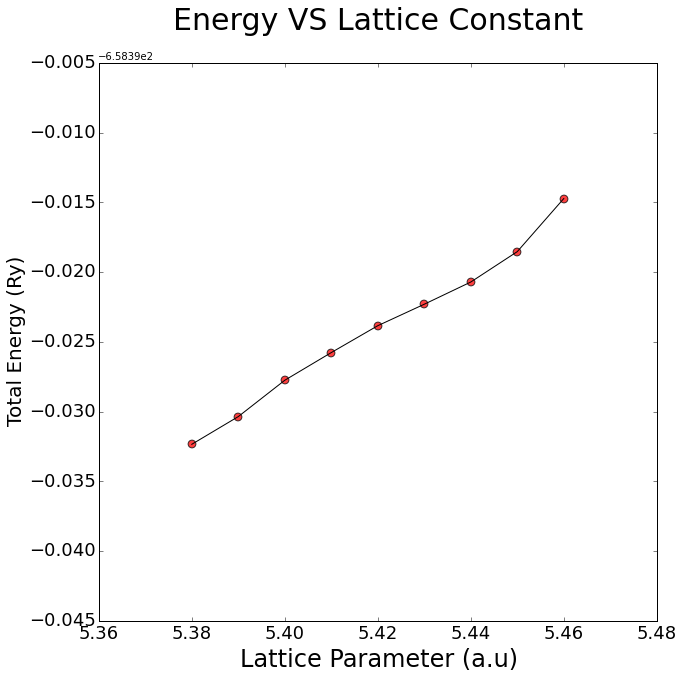

In [12]:
fig, ax0=plt.subplots(nrows=1)
fig.set_size_inches(10,10)

ax0.scatter(x, y_energy,marker='o',alpha=0.75,s=60,c='r')
ax0.plot(x,y_energy,c='black')
ax0.set_title('Energy VS Lattice Constant',fontsize=30,y=1.05)
ax0.set_xlabel('Lattice Parameter (a.u)',fontsize=24)
ax0.set_ylabel(r'Total Energy (Ry)',fontsize=20)
# ax0.set_ylim(-93.456,-93.44)
ax0.tick_params(labelsize = 18)
# ax0.annotate('Lowest Energy: 10.33 a.u.', xy=(10.33, -93.45421),  xycoords='data',
#                 xytext=(-50, -30), textcoords='offset points',
#                 arrowprops=dict(arrowstyle="->",
#                                 connectionstyle="angle3,angleA=0,angleB=-90"),fontsize=15
#                 )

# ax1.scatter(x,y_conver,marker='o',alpha=0.75, s=60,c='b')
# ax1.plot(x,y_conver,c='black')
# ax1.set_title('Force Convergence Vs K-points',fontsize=24,y=1.05)
# ax1.set_xlabel('# of K-points',fontsize=24)
# ax1.set_ylabel(r'Force Converge $meV/\AA$',fontsize=18)
# # ax1.set_yscale('log')
# ax1.set_ylim(-1,40)
# ax1.annotate(r'Convergence < 5 $meV/\AA$ # Kpoints: 205', xy=(207, 5),  xycoords='data',
#                 xytext=(0.95, 0.95), textcoords='axes fraction',
#                 arrowprops=dict(facecolor='black', shrink=0.05),
#                 horizontalalignment='right', verticalalignment='top',fontsize=16
#                 )
# ax1.tick_params(labelsize = 18)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [18]:
plt.show()